<a href="https://colab.research.google.com/github/haroldw-arista/Artemis/blob/main/seaside.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
  
from pymongo import MongoClient

In [ ]:
df = pd.read_csv('Clearwater2Ms_speed-50000_rxcore-b52_txcore-b52.csv')
df = df[df['skefDeGen'].notna()]
coldDf = df[df['chamber_temperature']==0]
roomDf = df[df['chamber_temperature']==25]
hotDf = df[df['chamber_temperature']==50]

In [ ]:
berBins = np.arange(-12,-4,1)

In [ ]:
# Let's look at all the lanes that have a BER greater than 1E-7 at ESS
# We will look at the failure distribution per rx_lane
berThreshold = -7
tarDf = coldDf[coldDf['ber']>berThreshold]
tarDf.loc[:, 'Count'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [ ]:
tarDf.groupby(['rxlane_serdes']).count()['Count']

rxlane_serdes
dies/0/lanes/1      4
dies/0/lanes/10     2
dies/0/lanes/2     57
Name: Count, dtype: int64

In [ ]:
tarLane = 'dies/0/lanes/2'

In [ ]:
def plotHistByLane(df, tarLane, temp, column, bins):
  df.loc[(df['rxlane_serdes']==tarLane)&(df['chamber_temperature']==temp), column].hist(bins=bins)
  plt.title(f'{tarLane} {column} Histogram at {temp}C')
  plt.xlabel(column)
  plt.ylabel('Count')

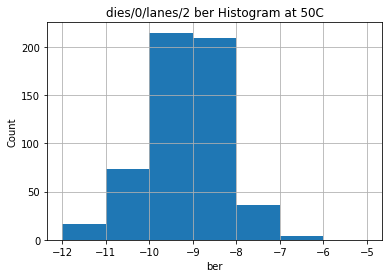

In [ ]:
plotHistByLane(df, tarLane, 50, 'ber', bins=berBins)

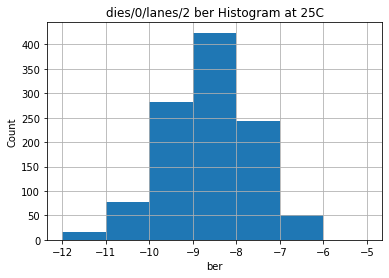

In [ ]:
plotHistByLane(df, tarLane, 25, 'ber', bins=berBins)

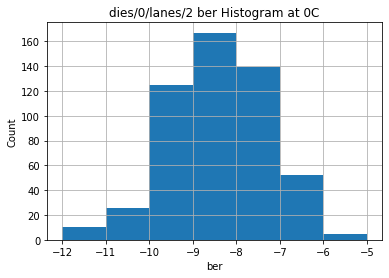

In [ ]:
plotHistByLane(df, tarLane, 0, 'ber', bins=berBins)

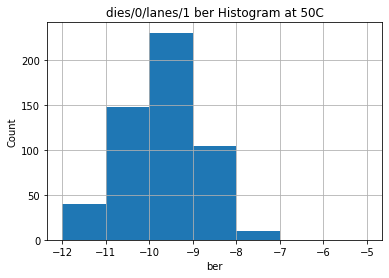

In [ ]:
plotHistByLane(df, 'dies/0/lanes/1', 50, 'ber', bins=berBins)

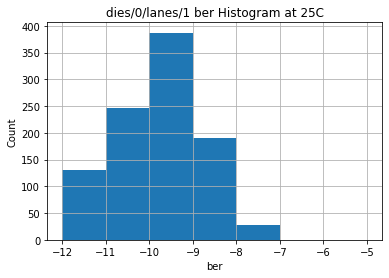

In [ ]:
plotHistByLane(df, 'dies/0/lanes/1', 25, 'ber', bins=berBins)

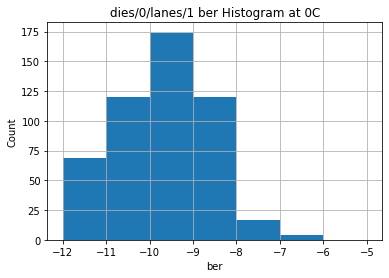

In [ ]:
plotHistByLane(df, 'dies/0/lanes/1', 0, 'ber', bins=berBins)

In [ ]:
df.loc[:, 'skefDeGen'].unique()

array([2., 5., 1., 4., 6., 7., 3., 0.])

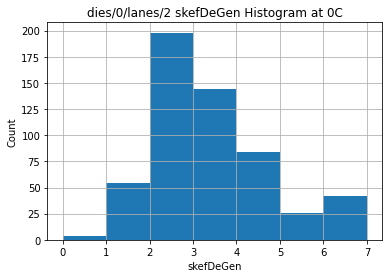

In [ ]:
# On this lane, the skefDeGen pararmeter is really scattered.
skefDeGenBin = np.arange(0, 8, 1)
plotHistByLane(df, tarLane, 0, 'skefDeGen', bins=skefDeGenBin)

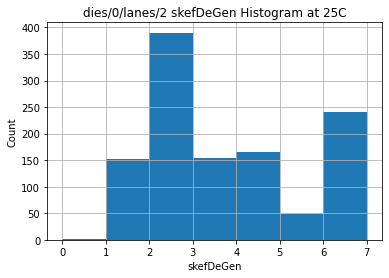

In [ ]:
plotHistByLane(df, tarLane, 25, 'skefDeGen', bins=skefDeGenBin)

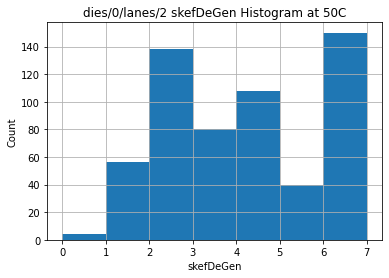

In [ ]:
plotHistByLane(df, tarLane, 50, 'skefDeGen', bins=skefDeGenBin)

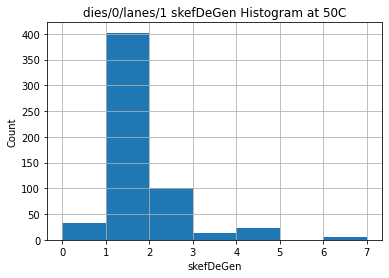

In [ ]:
plotHistByLane(df, 'dies/0/lanes/1', 50, 'skefDeGen', bins=skefDeGenBin)

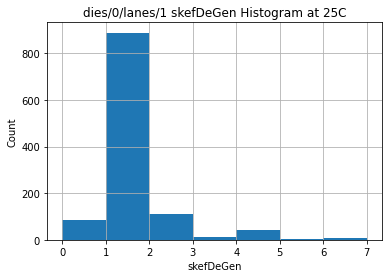

In [ ]:
plotHistByLane(df, 'dies/0/lanes/1', 25, 'skefDeGen', bins=skefDeGenBin)

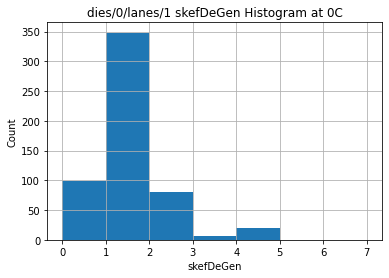

In [ ]:
plotHistByLane(df, 'dies/0/lanes/1', 0, 'skefDeGen', bins=skefDeGenBin)

In [ ]:
rxColumns = ['ber',	'ctle',	'dcGains_agcGain1',	'dcGains_agcGain2',
             'dcGains_ffeGain1', 'dcGains_ffeGain2',	'deltaPh',
             'dfeTaps_f0',	'dfeTaps_f1',	'dfeTaps_f13',	'eyeScore0',
             'eyeScore1',	'eyeScore2',	'ffeTaps_k1',
             'ffeTaps_k2',	'ffeTaps_k3',	'ffeTaps_k4',	'ffeTaps_s1',
             'ffeTaps_s2',	'fwChannelEstimate',	'fwOf',	'hwHf',
             'rxPllVcoCap',	'rxPpm',	'skefDeGen']

In [ ]:
coldDf.loc[coldDf['rxlane_serdes']=='dies/0/lanes/2', rxColumns].describe()

,ber,ctle,dcGains_agcGain1,dcGains_agcGain2,dcGains_ffeGain1,dcGains_ffeGain2,deltaPh,dfeTaps_f0,dfeTaps_f1,dfeTaps_f13,eyeScore0,eyeScore1,eyeScore2,ffeTaps_k1,ffeTaps_k2,ffeTaps_k3,ffeTaps_k4,ffeTaps_s1,ffeTaps_s2,fwChannelEstimate,fwOf,hwHf,rxPllVcoCap,rxPpm,skefDeGen
count,2712.000000,2712.000000,2712.000000,2712.00000,2712.0,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.0,552.000000
mean,-8.640126,9.984145,13.136431,13.44764,8.0,8.002581,0.466077,0.749005,0.200580,4.625369,199.404130,210.805678,199.053097,105.817109,-0.282080,86.057522,2.101401,2.989676,4.620944,1.601312,46.573746,29.276549,29.324484,0.0,2.931159
std,1.851417,1.769196,6.569143,3.32249,0.0,0.134417,2.594640,0.029671,0.025561,0.792666,27.145625,15.482842,17.257615,23.960924,23.831104,100.996322,60.195002,1.309065,3.416298,0.151108,3.020845,3.052147,1.236727,0.0,1.438001
min,-15.000000,6.200000,1.000000,5.00000,8.0,8.000000,-6.000000,0.493652,0.007813,1.000000,-532.000000,-201.000000,17.000000,21.000000,-145.000000,-240.000000,-240.000000,1.000000,1.000000,0.890625,8.000000,8.000000,27.000000,0.0,0.000000
25%,-9.139904,9.200000,9.000000,11.00000,8.0,8.000000,-1.000000,0.729492,0.186328,4.000000,189.000000,203.000000,189.000000,112.000000,-4.000000,1.000000,-2.000000,1.000000,4.000000,1.484375,46.000000,27.000000,29.000000,0.0,2.000000
50%,-8.242109,10.600000,13.000000,14.00000,8.0,8.000000,0.000000,0.748535,0.202734,5.000000,197.000000,214.000000,197.000000,116.000000,-2.000000,31.000000,-2.000000,4.000000,4.000000,1.621094,47.000000,29.000000,29.000000,0.0,3.000000
75%,-7.516211,11.100000,18.000000,16.00000,8.0,8.000000,2.000000,0.766113,0.217676,5.000000,214.000000,223.000000,214.000000,120.000000,1.000000,191.000000,-2.000000,4.000000,4.000000,1.714844,48.000000,32.000000,31.000000,0.0,4.000000
max,-5.627204,14.400000,31.000000,21.00000,8.0,15.000000,9.000000,0.864258,0.271094,9.000000,257.000000,257.000000,262.000000,248.000000,141.000000,255.000000,255.000000,4.000000,15.000000,2.000000,54.000000,37.000000,33.000000,0.0,7.000000


In [ ]:
coldDf.loc[coldDf['rxlane_serdes']=='dies/0/lanes/1', rxColumns].describe()

,ber,ctle,dcGains_agcGain1,dcGains_agcGain2,dcGains_ffeGain1,dcGains_ffeGain2,deltaPh,dfeTaps_f0,dfeTaps_f1,dfeTaps_f13,eyeScore0,eyeScore1,eyeScore2,ffeTaps_k1,ffeTaps_k2,ffeTaps_k3,ffeTaps_k4,ffeTaps_s1,ffeTaps_s2,fwChannelEstimate,fwOf,hwHf,rxPllVcoCap,rxPpm,skefDeGen
count,2712.000000,2712.000000,2712.000000,2712.000000,2712.0,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.0,552.000000
mean,-10.184754,9.650664,13.378687,12.744838,8.0,8.003687,3.325959,0.782026,0.169938,4.496313,210.557522,227.080752,206.397861,108.964602,-8.345501,62.024336,-58.235988,2.653761,3.874631,1.573041,46.724189,29.829646,29.362832,0.0,1.097826
std,1.699022,1.322168,6.746615,3.211896,0.0,0.146221,3.108505,0.038931,0.036423,0.612775,24.282922,21.368000,21.375856,24.391832,24.111762,80.030570,76.590821,1.419925,2.311214,0.102958,1.218584,1.997351,1.213926,0.0,0.826860
min,-15.000000,6.800000,1.000000,5.000000,8.0,8.000000,-6.000000,0.673828,-0.002734,3.000000,-437.000000,-330.000000,-472.000000,20.000000,-225.000000,-240.000000,-249.000000,1.000000,1.000000,1.285156,43.000000,25.000000,27.000000,0.0,0.000000
25%,-10.785860,9.200000,8.000000,10.000000,8.0,8.000000,1.000000,0.754395,0.145703,4.000000,197.000000,218.000000,197.000000,113.000000,-6.000000,16.000000,-83.000000,1.000000,4.000000,1.500000,46.000000,28.000000,29.000000,0.0,1.000000
50%,-9.884002,9.200000,12.000000,14.000000,8.0,8.000000,3.000000,0.777832,0.173828,4.000000,206.000000,232.000000,206.000000,118.000000,-2.000000,25.000000,-25.000000,3.000000,4.000000,1.585938,47.000000,30.000000,29.000000,0.0,1.000000
75%,-9.145728,10.600000,19.000000,16.000000,8.0,8.000000,5.000000,0.807129,0.196484,5.000000,223.000000,240.000000,218.000000,122.000000,-2.000000,79.000000,-2.000000,4.000000,4.000000,1.644531,48.000000,31.000000,31.000000,0.0,1.000000
max,-6.019583,13.700000,30.000000,19.000000,8.0,15.000000,15.000000,0.946289,0.265625,9.000000,266.000000,283.000000,266.000000,255.000000,75.000000,255.000000,79.000000,4.000000,15.000000,1.898438,57.000000,36.000000,33.000000,0.0,4.000000


In [ ]:
coldDf.loc[coldDf['rxlane_serdes']=='dies/0/lanes/3', rxColumns].describe()

,ber,ctle,dcGains_agcGain1,dcGains_agcGain2,dcGains_ffeGain1,dcGains_ffeGain2,deltaPh,dfeTaps_f0,dfeTaps_f1,dfeTaps_f13,eyeScore0,eyeScore1,eyeScore2,ffeTaps_k1,ffeTaps_k2,ffeTaps_k3,ffeTaps_k4,ffeTaps_s1,ffeTaps_s2,fwChannelEstimate,fwOf,hwHf,rxPllVcoCap,rxPpm,skefDeGen
count,2712.000000,2712.000000,2712.000000,2712.000000,2712.0,2712.0,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.000000,2712.0,552.000000
mean,-13.867221,8.822124,13.460177,11.471239,8.0,8.0,1.490413,0.762483,0.188809,4.198378,220.783923,228.058997,218.087758,98.597714,2.699484,49.097714,-115.146386,3.350295,3.421829,1.514366,46.726401,30.962389,29.300885,0.0,1.898551
std,1.835706,1.417141,6.216128,2.781596,0.0,0.0,2.959069,0.038633,0.035142,0.611965,28.961653,15.614861,16.434989,30.019778,7.513570,75.229831,92.547269,1.122721,1.820356,0.099997,2.244629,2.359920,1.263872,0.0,1.332491
min,-15.000000,6.200000,1.000000,5.000000,8.0,8.0,-6.000000,0.665039,0.058203,1.000000,-550.000000,-34.000000,35.000000,16.000000,-82.000000,-240.000000,-255.000000,1.000000,1.000000,0.875000,7.000000,7.000000,27.000000,0.0,0.000000
25%,-15.000000,7.600000,9.000000,9.000000,8.0,8.0,-1.000000,0.735352,0.166016,4.000000,210.000000,218.000000,206.000000,68.000000,-2.000000,1.000000,-240.000000,3.000000,1.000000,1.437500,46.000000,29.000000,29.000000,0.0,1.000000
50%,-15.000000,9.200000,13.000000,12.000000,8.0,8.0,1.000000,0.757324,0.193750,4.000000,218.000000,232.000000,214.000000,115.000000,1.000000,26.000000,-86.000000,4.000000,4.000000,1.535156,47.000000,31.000000,29.000000,0.0,2.000000
75%,-11.962572,9.200000,18.000000,14.000000,8.0,8.0,3.000000,0.786621,0.212891,4.000000,232.000000,240.000000,232.000000,119.000000,4.000000,71.000000,-33.000000,4.000000,4.000000,1.585938,48.000000,33.000000,31.000000,0.0,2.000000
max,-7.840987,11.100000,29.000000,18.000000,8.0,8.0,11.000000,0.906738,0.296484,8.000000,266.000000,290.000000,266.000000,191.000000,62.000000,255.000000,95.000000,4.000000,15.000000,1.769531,56.000000,37.000000,33.000000,0.0,7.000000
